In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive
#                       use widget for jupyterlab needs ipympl to be installed
%pylab --no-import-all notebook
%gui qt

%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "../pyTEMlib/")

# Import libraries from pyTEMlib
import pyTEMlib
import pyTEMlib.file_tools as ft     # File input/ output library
import pyTEMlib.image_tools as it
# import pyTEMlib.interactive_image

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset= ft.open_file()
# im_show = pyTEMlib.interactive_image.ImageDialog(dataset)

C:\Users\gduscher\Anaconda3\lib\site-packages\pyNSID\io\nsi_reader.py:41: FutureWarning: This Reader will eventually be moved to the ScopeReaders package. Be prepared to change your import statements
  warn('This Reader will eventually be moved to the ScopeReaders package'


<IPython.core.display.Javascript object>


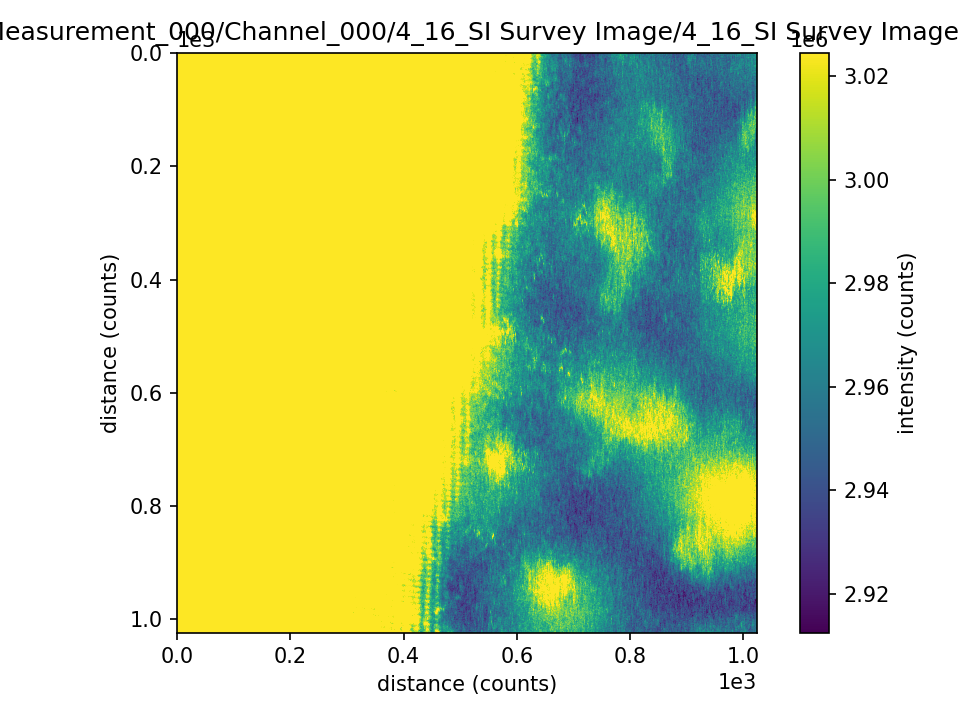

In [10]:
import image_dialog 
info = image_dialog.ImageDialog(dataset)
info.show()

In [5]:
def read_nion_image_info(original_metadata):
    if 'metadata' not in original_metadata:
        return {}
    
    if 'hardware_source' not in original_metadata['metadata']:
        return {}
    print(original_metadata['metadata']['hardware_source'].keys())
    if  'ImageScanned' not in original_metadata['metadata']['hardware_source']:
        return {}
    
    
    exp_dictionary = original_metadata['metadata']['hardware_source']['ImageScanned']
    experiment = {}
    print(exp_dictionary)
    if 'autostem' in exp_dictionary:
        print('auto')
    
            
    
    print(exp_dictionary.keys())
    print()
    
    
    print(experiment)
            
read_nion_image_info(dataset.original_metadata)    

#print(om.dataset.metadata['experiment'])
#dataset.view_original_metadata()

{}

In [6]:
im_show.show()

NameError: name 'im_show' is not defined

In [60]:
im_show.update()

KeyError: 'exposure_time'

In [57]:
dd = it.read_dm3_image_info(om.dataset.original_metadata)
print(dd)
#om.dataset.metadata['experiment'].update(it.read_dm3_image_info(om.dataset.original_metadata))
print(om.dataset.metadata['experiment'])

{'exposure_time': 0.5, 'microscope': 'Libra 200 MC', 'acceleration_voltage': 199990.28125, 'convergence_angle': 0.0, 'collection_angle': 100.0}
{'FOV_x': 22.766481399536133, 'FOV_y': 22.766481399536133, 'exposure_time': 0.5, 'convergence_angle': 0.0, 'collection_angle': 100.0, 'acceleration_voltage': 199990.28125, 'flux': 1.0, 'microscope': 'Libra 200 MC'}


In [ ]:
print(om.image.min())
plt.figure()
plt.imshow(om.image.T)
print
print(numpy.nan_to_num(om.image).min())
print(om.image[1024:,1024:])
om.image[om.image == None] = 0.
#print(np.array(om.image).min())
#hist, bin_edges = np.histogram(om.image, bins=bins, range=[om.v_min, om.v_max], density=True)
        

In [8]:
def read_dm3_image_info(original_metadata):
    if 'DM' not in original_metadata:
        return {}
    main_image = original_metadata['DM']['chosen_image']
    exp_dictionary = original_metadata['ImageList'][str(main_image)]['ImageTags']
    experiment = {}
    
    if 'Acquisition' in exp_dictionary:
        if 'Parameters' in exp_dictionary['Acquisition']:
            if 'High Level' in exp_dictionary['Acquisition']['Parameters']:
                if 'Exposure (s)' in exp_dictionary['Acquisition']['Parameters']['High Level']:
                    experiment['exposure_time'] = exp_dictionary['Acquisition']['Parameters']['High Level']['Exposure (s)']
    
    if 'Microscope Info' in exp_dictionary:
        if 'Microscope'  in exp_dictionary['Microscope Info']:
            experiment['microscope'] = exp_dictionary['Microscope Info']['Microscope']
        if 'Voltage'  in exp_dictionary['Microscope Info']:
            experiment['acceleration_voltage'] = exp_dictionary['Microscope Info']['Voltage']
        if 'Illumination Mode' in exp_dictionary['Microscope Info']:
            if exp_dictionary['Microscope Info']['Illumination Mode'] == 'TEM':
                experiment['convergence_angle'] = 0.0
                experiment['collection_angle'] = 100.0
            if exp_dictionary['Microscope Info']['Illumination Mode'] == 'SPOT':
                experiment['convergence_angle'] = 20.0
                experiment['collection_angle'] = 50.0
            
    
    print(exp_dictionary['Microscope Info'])
    print()
    
    print(exp_dictionary['Acquisition']['Parameters'].keys())
    
    print(experiment)
            
read_dm3_image_info(dataset.original_metadata)    

#print(om.dataset.metadata['experiment'])
#om.dataset.view_original_metadata()

{'Cs(mm)': 0.0, 'Emission Current (µA)': 0.0, 'Illumination Mode': 'TEM', 'Imaging Mode': 'IMAGING', 'Indicated Magnification': 1.0, 'Items': {'0': {'Data Type': 20, 'Label': 'Specimen', 'Tag path': 'Microscope Info:Specimen', 'Value': 'Murch on lacey C'}, '1': {'Data Type': 20, 'Label': 'Operator', 'Tag path': 'Microscope Info:Operator', 'Value': ''}, '2': {'Data Type': 20, 'Label': 'Microscope', 'Tag path': 'Microscope Info:Microscope', 'Value': 'UltraSTEM 60 kV'}}, 'Microscope': 'UltraSTEM 60 kV', 'Operation Mode': 'IMAGING', 'Operator': '', 'Probe Current (nA)': 0.0, 'Probe Size (nm)': 0.0, 'Specimen': 'Murch on lacey C', 'STEM Camera Length': 0.0, 'Voltage': 100000.0}



KeyError: 'Acquisition'

In [104]:
om = iimage.ImageDialog2(dataset)
om.show()

In [9]:
from PyQt5.QtCore import *
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
from PyQt5 import QtWidgets
from PyQt5 import QtCore
from PyQt5 import QtGui

import numpy as np
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as Canvas
from matplotlib.figure import Figure

from matplotlib.widgets import SpanSelector
from skimage import exposure


In [16]:
class MySICanvas(Canvas):
    def __init__(self, parent, width=10, height=10, dpi=100):
        self.figure = Figure(figsize=(width, height), dpi=dpi)       
        self.figure.subplots_adjust(bottom=.2)        
        Canvas.__init__(self, self.figure)
        self.setParent(parent)
        
        Canvas.setSizePolicy(self, QSizePolicy.Expanding, QSizePolicy.Expanding)
        
        Canvas.updateGeometry(self)

class UiDialog(object):
    def __init__(self, dialog, parent=None):
        dialog.setObjectName('Spectrum Info')
        dialog.resize(371, 684)

        valid_float = QtGui.QDoubleValidator()
        valid_int = QtGui.QIntValidator()
        self.histogram = MySICanvas(parent,width=10, height=10, dpi=70)        
        
        # Defining a plot instance (axes) and asigning a variable to it
        self.histogram.axes = self.histogram.figure.add_subplot(1,1,1)
        
        plotLayout = QGridLayout()
        
        #Ading SI image and sliders to the layout
        plotLayout.addWidget(self.histogram,0,0)        

        # making a single widget out of image and slider
        siPlot = QtWidgets.QWidget()
        siPlot.setLayout(plotLayout)
        
        layout = self.layout = QtWidgets.QGridLayout()
        self.layout.setVerticalSpacing(2)

        self.separator1 = QtWidgets.QLabel()
        self.separator1.setAutoFillBackground(True)
        palette = self.separator1.palette()
        palette.setColor(self.separator1.backgroundRole(), QtCore.Qt.blue)
        palette.setColor(self.separator1.foregroundRole(), QtCore.Qt.white)
        self.separator1.setAlignment(QtCore.Qt.AlignCenter)
        self.separator1.setMaximumHeight(50)

        self.separator1.setPalette(palette)
        ######################################################################
        self.separator1.setText("Histogram")
        layout.addWidget(self.separator1,0,0,1,3) 
        row = 0
        layout.addWidget(self.separator1, row, 0, 1, 4)
        ######################################################################

        row += 1
        self.offsetLabel = QtWidgets.QLabel("Offset")
        self.offsetEdit = QtWidgets.QLineEdit(" 1.00")
        self.offsetEdit.setValidator(valid_float)
        self.offsetUnit = QtWidgets.QLabel("eV")
        layout.addWidget(self.offsetLabel, row, 0)
        layout.addWidget(self.offsetEdit, row, 1)
        layout.addWidget(self.offsetUnit, row, 2)


        self.separator2 = QtWidgets.QLabel()
        self.separator2.setAutoFillBackground(True)
        self.separator2.setAlignment(QtCore.Qt.AlignCenter)
        self.separator2.setMaximumHeight(50)
        self.separator2.setPalette(palette)

        row += 1
        ######################################################################
        self.separator2.setText("Microscope")
        layout.addWidget(self.separator2, row, 0, 1, 4)
        
        row += 1
        layout.addWidget(siPlot,row,0,1,3)
        dialog.setLayout(layout)
        
        


class ImageDialog(QWidget):
    def __init__(self, dataset, parent=None):
        super(ImageDialog, self).__init__(parent)
        self.parent = parent
        self.debug = 0
        self.dataset = dataset
        self.image = np.array(self.dataset)
        self.v_min = np.array(dataset).min()
        self.v_max = np.array(dataset).max()
        
        bins = 256
        
        self.ui = UiDialog(self)
        
        self.dataset.plot()
        self.histogram()
        self.cid = self.ui.histogram.axes.figure.canvas.mpl_connect('button_press_event', self.onclick)

        self.span = SpanSelector(self.ui.histogram.axes, self.on_select, 'horizontal', useblit=False,
                                 button=1, minspan = 5,
                                 rectprops=dict(alpha=0.5, facecolor='blue'))
        
    def histogram(self, bins=256):
        ax_hist = self.ui.histogram.axes
        ax_hist.clear()
        
        hist, bin_edges = np.histogram(np.array(self.image), range = [self.v_min, self.v_max], bins=bins, density=True)
        ax_hist.plot(np.array(bin_edges)[:-1], np.array(hist))
        
        image = self.image*1.0
        image[image<self.v_min] = self.v_min
        image[image>self.v_max] = self.v_max
        
        img_cdf, bins = exposure.cumulative_distribution(np.array(image), bins)
        ax_hist.plot(bins, img_cdf*hist.max(), 'r')
        ax_hist.figure.canvas.draw()
        self.plot()
    
    def onclick(self,event):
        self.setWindowTitle('kk')
        if event.dblclick:
            self.v_min = np.array(self.dataset).min()
            self.v_max = np.array(self.dataset).max()
            self.histogram()
            
    def on_select(self, v_min, v_max):
        self.v_min = v_min
        self.v_max = v_max
        self.histogram()
        
    def plot(self):
        ax = self.dataset.view.axis
        img = self.dataset.view.img
        img.set_data(self.image)
        img.set_clim(vmin=self.v_min, vmax=self.v_max)
        self.dataset.view.axis.figure.canvas.draw()
        print(self.v_min)
        

In [5]:
# -*- coding: utf-8 -*-
from pyTEMlib.microscope import microscope


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 133: invalid continuation byte

<IPython.core.display.Javascript object>


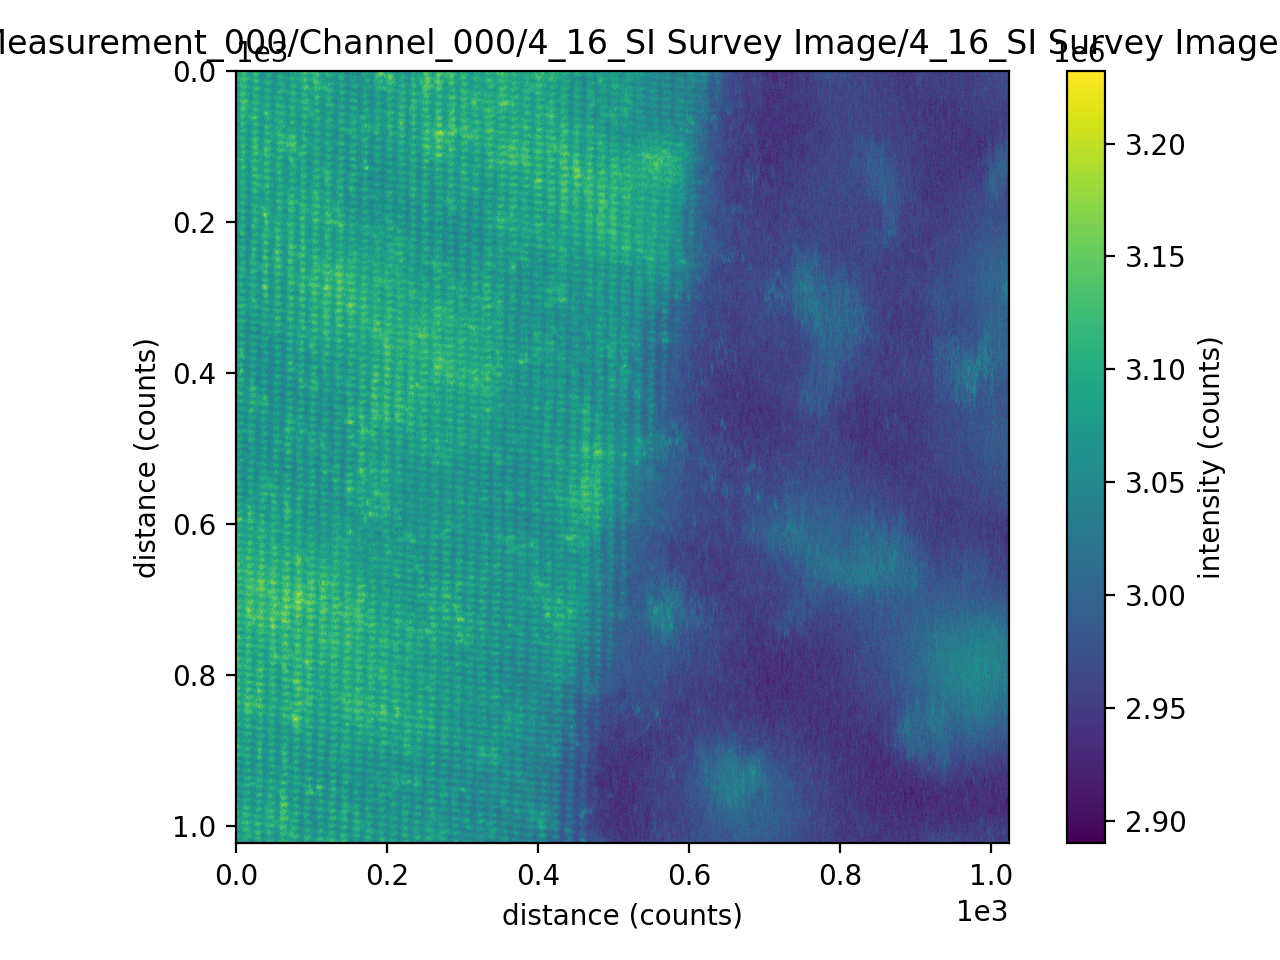

2889982


In [34]:
import image_dialog 
info = image_dialog.ImageDialog(dataset)
info.show()

In [31]:
dataset.metadata['experiment']

{'size': (1024, 1024),
 'exposure_time': 0.0,
 'convergence_angle': 0.0,
 'acceleration_voltage': 100.0,
 'binning': 1,
 'conversion': 1.0,
 'flux': 1.0,
 'current': 1.0}

In [130]:
import sidpy
image_dim = ft.get_dimensions_by_type([sidpy.DimensionTypes.RECIPROCAL, sidpy.DimensionTypes.SPATIAL],
                                                   dataset)
if len(image_dim) != 2:
    raise TypeError('We need exactly two SPATIAL or RECIPROCAL dimensions')
    
dim_x =image_dim[0][1]
print(dim_x.units)
print(image_dim[1][1])

counts
y:  distance (counts) of size (1664,)


<IPython.core.display.Javascript object>


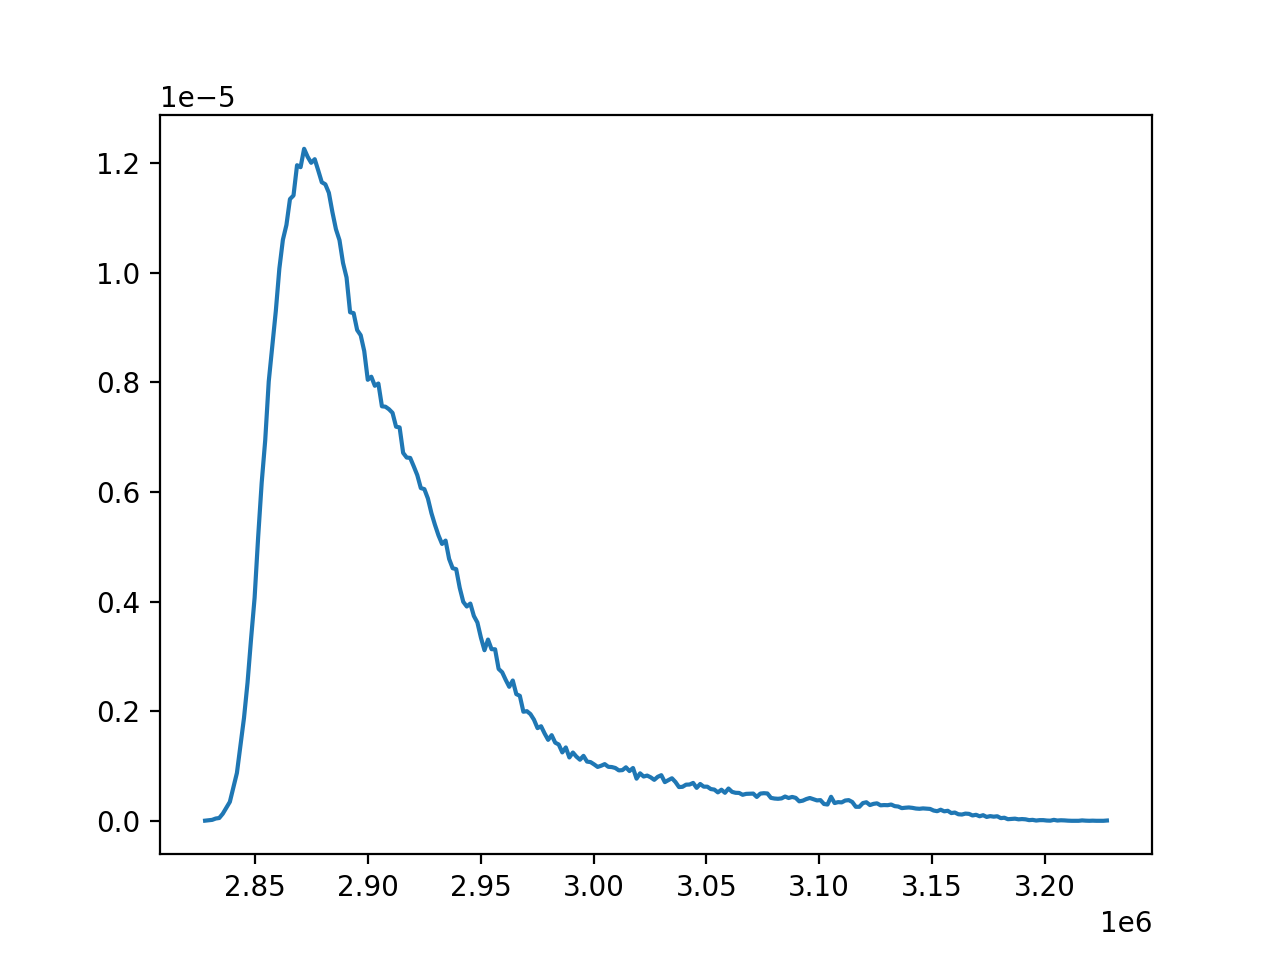

In [37]:
import dask as da
v_min = np.array(dataset).min()
v_max = np.array(dataset).max()
image = np.array(dataset)
bins = 256
hist, bin_edges = np.histogram(image, bins=bins, range=[v_min,v_max], density=True)
plt.figure()
plt.plot( np.array(bin_edges)[:-1], np.array(hist))